In [1]:
# Dependencies
import requests
import json
from config import nyt_key, omdb_key
from bs4 import BeautifulSoup as bs
from splinter import Browser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Target Movie & Year
target_movie = "Guardians of the Galaxy"
target_year = '2014'

# Build the endpoint URL for NYT review
target_url = ('https://api.nytimes.com/svc/movies/v2/reviews/'
              'search.json?query={0}&opening-date={1}-01-01;{1}-12-31&api-key={2}').format(target_movie, target_year, nyt_key)
print(target_url)

https://api.nytimes.com/svc/movies/v2/reviews/search.json?query=Guardians of the Galaxy&opening-date=2014-01-01;2014-12-31&api-key=7Iq3bDbTjOL67eWDmKRyj598PH2C99oz


In [3]:
# Run a request to endpoint and convert result to json
movie_data = requests.get(target_url).json()

# Print the json
print(json.dumps(movie_data, indent=4, sort_keys=True))

{
    "copyright": "Copyright (c) 2019 The New York Times Company. All Rights Reserved.",
    "has_more": false,
    "num_results": 1,
    "results": [
        {
            "byline": "MANOHLA DARGIS",
            "critics_pick": 0,
            "date_updated": "2017-11-02 04:18:19",
            "display_title": "Guardians of the Galaxy",
            "headline": "Yee-Ha! Space Cowboy Rides to the Rescue",
            "link": {
                "suggested_link_text": "Read the New York Times Review of Guardians of the Galaxy",
                "type": "article",
                "url": "http://www.nytimes.com/2014/08/01/movies/chris-pratt-stars-in-guardians-of-the-galaxy.html"
            },
            "mpaa_rating": "PG-13",
            "multimedia": {
                "height": 140,
                "src": "https://static01.nyt.com/images/2014/07/31/movies/guardians-image/guardians-image-mediumThreeByTwo210.jpg",
                "type": "mediumThreeByTwo210",
                "width": 210
 

In [4]:

movie_title = movie_data["results"][0]["display_title"]
review_url = movie_data["results"][0]["link"]["url"]

# Print the latitude and longitude
print('''
    Movie Name: {0}
    url: {1}
    '''.format(movie_title, review_url))


    Movie Name: Guardians of the Galaxy
    url: http://www.nytimes.com/2014/08/01/movies/chris-pratt-stars-in-guardians-of-the-galaxy.html
    


## Use Beautiful Soup to pull review text

In [5]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

response = requests.get(review_url)
browser.visit(review_url)

In [6]:
# Using old class, pull text of review
html = browser.html
soup = bs(html, 'html.parser')
paragraphs = soup.find_all('p', class_='story-body-text story-content')
rt1 = ''

for paragraph in paragraphs:
    review_text1 = paragraph.text
    rt1 = rt1 + ' ' + review_text1


In [7]:
# Using new class, pull text of review
html = browser.html
soup = bs(html, 'html.parser')

ps = soup.find_all('p', class_='css-exrw3m evys1bk0')
rt2 = ''
for p in ps:
    review_text2 = p.text
    rt2 = rt2 + ' ' + review_text2

In [8]:
# Create if statement to print all text and create one variable for review text
review_text = rt2 + rt1


In [20]:
# review_text = "This is not bullshit"
def sentiment_scores(review): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(review) 
      

    print("Movie was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("Movie was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("Movie was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Movie Overall Rated As", end = " ") 
  
    sentiment = ""
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
        sentiment = "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
        sentiment = "Negative"
    else : 
        print("Neutral") 
        sentiment = "Neutral"
  
    return sentiment 
    
# Driver code 
if __name__ == "__main__" : 
  
    print("\n1st statement :") 
  
    # function calling 
    sentiment = sentiment_scores(review_text) 
  
    


1st statement :
Movie was rated as  8.9 % Negative
Movie was rated as  77.0 % Neutral
Movie was rated as  14.099999999999998 % Positive
Movie Overall Rated As Positive


In [21]:
df = pd.DataFrame(columns =["reviewText"])
df.loc[0] = review_text

In [22]:
comment_words = ' '
stopwords = set(STOPWORDS)


for word in df.reviewText:
    word = str(word)
    tokens = word.split()
    
    for words in tokens:
        comment_words = comment_words + words + ' '

print(comment_words)

 Talking about directing in blockbusters is sometimes nothing more than wishful thinking. Most are such impersonally operated machines — dedicated to the business of brand storytelling — that they tend to obliterate any whisper of individuality. That there’s a palpable directorial sensibility in “Guardians of the Galaxy,” along with other signs of genuine life, helps separate this latest Marvel cash grab from a lot of off-the-rack movie cartoons. Here, a pulse, wit, beauty and a real sensibility have been slipped into the fray, alongside the clockwork guffaws, kabooms and splats. Lifted by a cast of professional charmers and a “What, me worry?” vibe, “Guardians of the Galaxy” is one of those interstellar westerns about a motley group of appealing baddies who rise to the heroic occasion and ride to the rescue, on spaceships rather than Appaloosas. The John Wayne role here — or, really, the 1970s Harrison Ford one — belongs to Chris Pratt, an easygoing, comic performer who’s very good at

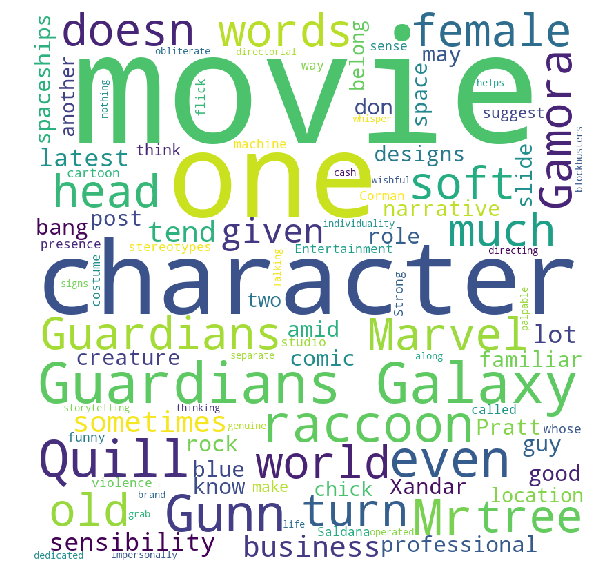

In [23]:
# Create wordcloud

wordcloud = WordCloud(width = 800, height = 800,
                max_words = 100,
               background_color ='white',
               stopwords = stopwords,
               min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [24]:
print(target_movie)
print(target_year)

Guardians of the Galaxy
2014


In [25]:
# Build the endpoint URL for OMDB data

omdb_url = ('http://www.omdbapi.com/?t={0}&y={1}&apikey={2}').format(target_movie, target_year, omdb_key)
print(omdb_url)

http://www.omdbapi.com/?t=Guardians of the Galaxy&y=2014&apikey=4f4f2273


In [26]:
# Run a request to endpoint and convert result to json
omdb_data = requests.get(omdb_url).json()

# Print the json
print(json.dumps(omdb_data, indent=4, sort_keys=True))

{
    "Actors": "Chris Pratt, Zoe Saldana, Dave Bautista, Vin Diesel",
    "Awards": "Nominated for 2 Oscars. Another 52 wins & 99 nominations.",
    "BoxOffice": "$270,592,504",
    "Country": "USA",
    "DVD": "09 Dec 2014",
    "Director": "James Gunn",
    "Genre": "Action, Adventure, Comedy, Sci-Fi",
    "Language": "English",
    "Metascore": "76",
    "Plot": "A group of intergalactic criminals must pull together to stop a fanatical warrior with plans to purge the universe.",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMTAwMjU5OTgxNjZeQTJeQWpwZ15BbWU4MDUxNDYxODEx._V1_SX300.jpg",
    "Production": "Walt Disney Pictures",
    "Rated": "PG-13",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "8.1/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "91%"
        },
        {
            "Source": "Metacritic",
            "Value": "76/100"
        }
    ],
    "Released": "01 Aug 2014",
  

In [27]:
movie_title = movie_data["results"][0]["display_title"]
movie_year = omdb_data["Year"]
imdb_rating = omdb_data["imdbRating"]
genre = omdb_data["Genre"]
plot = omdb_data["Plot"]
print(movie_title)
print(movie_year)
print(imdb_rating)
print(genre)
print(plot)

Guardians of the Galaxy
2014
8.1
Action, Adventure, Comedy, Sci-Fi
A group of intergalactic criminals must pull together to stop a fanatical warrior with plans to purge the universe.


In [28]:
df2 = pd.DataFrame(columns =["movie_title","movie_year","imdb_rating","sentiment","genre","plot","review_text"])

df2.loc[0] = [movie_title,movie_year, imdb_rating, sentiment, genre, plot, review_text]

df2.loc[0]


movie_title                              Guardians of the Galaxy
movie_year                                                  2014
imdb_rating                                                  8.1
sentiment                                               Positive
genre                          Action, Adventure, Comedy, Sci-Fi
plot           A group of intergalactic criminals must pull t...
review_text     Talking about directing in blockbusters is so...
Name: 0, dtype: object